In [3]:
# importing Libraries
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
# Data in .pkl.gz format
import gzip
import pickle

In [3]:
def load_data():
    f = gzip.open('mnist.pkl.gz', 'rb')
    f.seek(0)
    training_data, validation_data, test_data = pickle.load(f, encoding='latin1')
    f.close()
    return (training_data, validation_data, test_data)

In [4]:
training_data, validation_data, test_data = load_data()

### Data understanding

In [5]:
print(type(training_data),len(training_data))

<class 'tuple'> 2


In [6]:
training_data

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([5, 0, 4, ..., 8, 4, 8], dtype=int64))

- ok, so we have two numpy arrays in the tuple
- First features set then labels

In [7]:
print(training_data[0].shape,training_data[1].shape)

(50000, 784) (50000,)


In [8]:
print(validation_data[0].shape,validation_data[1].shape)
print(test_data[0].shape,test_data[1].shape)

(10000, 784) (10000,)
(10000, 784) (10000,)


In [9]:
# What is training data ? I believe it is 28x28 image. LEts check it out
samplearr = training_data[0][0]
samplearr = samplearr.reshape(28,28)
samplearr.shape


(28, 28)

In [10]:
# Lets try imshow from matplotlib to check if it shows anything
def showImage(arr):
    #wrote these lines before but making it function for future usage
    plt.figure(figsize=(1,1))
    plt.imshow(arr,cmap='Greys')

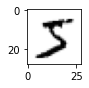

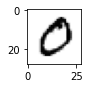

In [11]:
samplearr = training_data[0][0]
samplearr = samplearr.reshape(28,28)
showImage(samplearr) # It should be 5 
samplearr = training_data[0][1]
samplearr = samplearr.reshape(28,28)
showImage(samplearr) # It should be 0

- In case of training the 784 inputs would come together to form input for the network
- The target is a number / digit labeled for each cases
- For each 784 inputs, given a label from 10 digits - it is better to compute probability of the output labels being a certain class
- Hence, converting the target datasets into one hot encoded vectors

In [14]:
# defining one hot encoded vector  # label Binarizer can be used
def onehot(data):
    num = data.shape[0]
    arr = np.zeros((10,num))
    
    col=0
    for i in data:
        arr[i][col] =1
        col+=1
    
    return arr

In [15]:
onehot(np.array([5,1,2]))

array([[0., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 0.],
       [0., 0., 0.],
       [1., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [17]:
#Let us format the datasets correctly
train_df_X = training_data[0].T
train_df_y = onehot(training_data[1])
print(train_df_X.shape,train_df_y.shape)

(784, 50000) (10, 50000)


- We will process 1 input set as a single batch and 1 column in the target is the output of that batch

In [19]:
# Doing the same for validation and test sets
validation_X = validation_data[0].T
validation_y = onehot(validation_data[1])

test_X = test_data[0].T
test_y = onehot(test_data[1])

print("Validation Dataset :", validation_X.shape,validation_y.shape)
print("Test Dataset :",test_X.shape,test_y.shape)

Validation Dataset : (784, 10000) (10, 10000)
Test Dataset : (784, 10000) (10, 10000)


- In our case we would like to keep input layer having 784 neurons for each input datapoint
- 1 hidden layer having 45 neurons taking inputs from all input layer
- Output layer with 10 neurons which would give probabilities of each labels
<img src="feedforward.jpg" alt="feedforward"></img>

- Let us define activation functions first

In [20]:
# Relu
def relu(arr):
    out = np.maximum(0,arr)
    assert(out.shape == arr.shape)
    return out,arr

In [21]:
# Testing relu fn
relu(np.array([1,3,-3,100,-100]))

(array([  1,   3,   0, 100,   0]), array([   1,    3,   -3,  100, -100]))

In [22]:
# Softmax
def softmax(arr):
    Z_exp = np.exp(arr)
    Z_sum = np.sum(Z_exp,axis=0,keepdims=True)
    out = Z_exp/Z_sum
    return out,arr

In [23]:
softmax(np.array([1,3,-3,100,-100]))

(array([1.01122149e-43, 7.47197234e-43, 1.85211677e-45, 1.00000000e+00,
        1.38389653e-87]),
 array([   1,    3,   -3,  100, -100]))

In [24]:
# Sigmoid
def sigmoid(arr):
    Z_exp= np.exp(-arr)
    out = 1/(1+Z_exp)
    return out,arr

In [25]:
sigmoid(np.array([1,3,-3,100,-100]))

(array([7.31058579e-01, 9.52574127e-01, 4.74258732e-02, 1.00000000e+00,
        3.72007598e-44]),
 array([   1,    3,   -3,  100, -100]))

In [1]:
# Initialize parameters
dimensions = [784,45,10]
def initialize_parameters(dimensions):
    
    # dimensions is a list containing the number of neuron in each layer in the network
    # It returns parameters which is a python dictionary containing the parameters "W1", "b1", ..., "WL", "bL":

    np.random.seed(2)
    parameters = {}
    L = len(dimensions)            # number of layers in the network + 1

    for l in range(1, L): 
        parameters['W' + str(l)] = np.random.randn(dimensions[l], dimensions[l-1]) * 0.1
        parameters['b' + str(l)] = np.zeros((dimensions[l], 1)) 
        
        assert(parameters['W' + str(l)].shape == (dimensions[l], dimensions[l-1]))
        assert(parameters['b' + str(l)].shape == (dimensions[l], 1))

        
    return parameters

In [4]:
dimensions  = [784, 45,10]
parameters = initialize_parameters(dimensions)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-0.04167578 -0.00562668 -0.21361961 ... -0.06168445  0.03213358
  -0.09464469]
 [-0.05301394 -0.1259207   0.16775441 ... -0.03284246 -0.05623108
   0.01179136]
 [ 0.07386378 -0.15872956  0.01532001 ... -0.08428557  0.10040469
   0.00545832]
 ...
 [ 0.08905062  0.07040399 -0.08219343 ... -0.01449245 -0.06122183
   0.02644657]
 [-0.08982216 -0.03764587 -0.05486391 ...  0.11571805 -0.06069458
   0.01906126]
 [ 0.07903911 -0.0149561  -0.09171207 ...  0.17660684 -0.13286932
  -0.05818293]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
W2 = [[ 1.17468571e-02 -5.02481234e-02 -3.14525825e-02 -2.27898280e-03
   6.72031394e-02 -1.06401759e-01  5.14211713e-02 -9.71999970e-02
  -1.02584659e-01  1.41976359e-01  1.37019480e-01 -6.54097115e-02
   4.63439070e-02  4.036

In [28]:
def single_layer_forward(H_prev, W, b, activation = 'relu'):

    # H_prev is of shape (size of previous layer, number of examples)
    # W is weights matrix of shape (size of current layer, size of previous layer)
    # b is bias vector of shape (size of the current layer, 1)
    # activation is the activation to be used for forward propagation : "softmax", "relu", "sigmoid"

    # H is the output of the activation function 
    # memory is a python dictionary containing "linear_memory" and "activation_memory"
    
    if activation == "sigmoid":
        Z = np.dot(W, H_prev) + b 
        linear_memory = (H_prev, W, b)
        H, activation_memory = sigmoid(Z)
 
    elif activation == "softmax":
        Z = np.dot(W, H_prev) + b 
        linear_memory = (H_prev, W, b)
        H, activation_memory = softmax(Z)
    elif activation == "relu":
        #print(" shape w", W.shape, " shape H", H_prev)
        Z = np.dot(W, H_prev) + b
        linear_memory = (H_prev, W, b)
        H, activation_memory = relu(Z)
        
    assert (H.shape == (W.shape[0], H_prev.shape[1]))
    memory = (linear_memory, activation_memory)

    return H, memory

In [35]:
def multi_layer_forward(X, parameters):

    # X is input data of shape (input size, number of examples)
    # parameters is output of initialize_parameters()
    
    # HL is the last layer's post-activation value
    # memories is the list of memory containing (for a relu activation, for example):
    # - every memory of relu forward (there are L-1 of them, indexed from 1 to L-1), 
    # - the memory of softmax forward (there is one, indexed L) 

    memories = []
    H = X
    L = len(parameters) // 2                  # number of layers in the neural network
    #print(L)
    # Implement relu layer (L-1) times as the Lth layer is the softmax layer
    for l in range(1, L):
        H_prev = H 
        
        H, memory = single_layer_forward(H_prev, 
                                 parameters["W" + str(l)], 
                                 parameters["b" + str(l)], 
                                 activation='relu')
        memories.append(memory)
    
    # Implement the final softmax layer
    # HL here is the final prediction P as specified in the lectures
    HL, memory = single_layer_forward(H,
                              parameters["W" + str(L)], 
                              parameters["b" + str(L)], 
                              activation='softmax')
    memories.append(memory)

    assert(HL.shape == (10, X.shape[1]))
            
    return HL, memories

In [32]:
def compute_loss(HL, Y):


    # HL is probability matrix of shape (10, number of examples)
    # Y is true "label" vector shape (10, number of examples)

    # loss is the cross-entropy loss

    m = Y.shape[1]

    loss = (-1./ m) * np.sum(np.multiply(Y, np.log(HL)))
    
    loss = np.squeeze(loss)      # To make sure that the loss's shape is what we expect (e.g. this turns [[17]] into 17).
    assert(loss.shape == ())
    
    return loss

In [34]:
np.random.seed(2)
HL_sample = np.random.rand(10,5)
Y_sample = train_df_y[:, 10:15]
print(HL_sample)
print(Y_sample)

print(compute_loss(HL_sample, Y_sample))

[[0.4359949  0.02592623 0.54966248 0.43532239 0.4203678 ]
 [0.33033482 0.20464863 0.61927097 0.29965467 0.26682728]
 [0.62113383 0.52914209 0.13457995 0.51357812 0.18443987]
 [0.78533515 0.85397529 0.49423684 0.84656149 0.07964548]
 [0.50524609 0.0652865  0.42812233 0.09653092 0.12715997]
 [0.59674531 0.226012   0.10694568 0.22030621 0.34982629]
 [0.46778748 0.20174323 0.64040673 0.48306984 0.50523672]
 [0.38689265 0.79363745 0.58000418 0.1622986  0.70075235]
 [0.96455108 0.50000836 0.88952006 0.34161365 0.56714413]
 [0.42754596 0.43674726 0.77655918 0.53560417 0.95374223]]
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0.]
 [1. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
0.8964600261334037


### Backpropagation

In [36]:
def sigmoid_backward(dh,memory):
    Z = memory
    H = 1/(1+np.exp(-Z))
    dZ = dH * H * (1-H)
    assert (dZ.shape == Z.shape)
    
    return dZ

In [37]:
def relu_backward(dh, memory):
    Z=memory
    dZ= np.array(dh,copy=True)
    dZ[Z <= 0] = 0
    assert (dZ.shape == Z.shape)
    return dZ

In [38]:
def single_layer_backward(dH, memory, activation = 'relu'):
    
    # takes dH and the memory calculated in layer_forward and activation as input to calculate the dH_prev, dW, db
    # performs the backprop depending upon the activation function
    

    linear_memory, activation_memory = memory
    
    if activation == "relu":
        dZ = relu_backward(dH, activation_memory)
        H_prev, W, b = linear_memory
        m = H_prev.shape[1]
        dW = (1. / m) * np.dot(dZ, H_prev.T) 
        db = (1. / m) * np.sum(dZ, axis=1, keepdims=True)
        dH_prev = np.dot(linear_memory[1].T, dZ)

    elif activation == "sigmoid":
        dZ = sigmoid_backward(dH, activation_memory)
        H_prev, W, b = linear_memory
        m = H_prev.shape[1]
        dW = (1. / m) * np.dot(dZ, H_prev.T) 
        db = (1. / m) * np.sum(dZ, axis=1, keepdims=True)
        dH_prev = np.dot(linear_memory[1].T, dZ)
    
    return dH_prev, dW, db

In [40]:
# Lets test
H_prev = np.array([[1,0, 5, 10, 2], [2, 5, 3, 10, 2]])
W_sample = np.array([[10, 5], [2, 0], [1, 0]])
b_sample = np.array([10, 5, 0]).reshape((3, 1))

H, memory = single_layer_forward(H_prev, W_sample, b_sample, activation="relu")
np.random.seed(2)
dH = np.random.rand(3,5)
dH_prev, dW, db = single_layer_backward(dH, memory, activation = 'relu')
print('dH_prev is \n' , dH_prev)
print('dW is \n' ,dW)
print('db is \n', db)

dH_prev is 
 [[5.6417525  0.66855959 6.86974666 5.46611139 4.92177244]
 [2.17997451 0.12963116 2.74831239 2.17661196 2.10183901]]
dW is 
 [[1.67565336 1.56891359]
 [1.39137819 1.4143854 ]
 [1.3597389  1.43013369]]
db is 
 [[0.37345476]
 [0.34414727]
 [0.29074635]]


In [42]:
def multi_layer_backward(HL,Y,memories):
    gradients = {}
    L = len(memories) # the number of layers
    #print(L)
    m = HL.shape[1]
    Y = Y.reshape(HL.shape) # after this line, Y is the same shape as AL
    
    # Perform the backprop for the last layer that is the softmax layer
    current_memory = memories[-1]
    linear_memory, activation_memory = current_memory
    dZ = HL - Y
    H_prev, W, b = linear_memory
    gradients["dH" + str(L-1)] = np.dot(linear_memory[1].T, dZ)
    gradients["dW" + str(L)] = (1. / m) * np.dot(dZ, H_prev.T) 
    gradients["db" + str(L)] = (1. / m) * np.sum(dZ, axis=1, keepdims=True)
     
    # Perform the backpropagation l-1 times
    for l in reversed(range(L-1)):
        # Lth layer gradients: "gradients["dH" + str(l + 1)] ", gradients["dW" + str(l + 2)] , gradients["db" + str(l + 2)]
        current_memory = memories[l]
        
        dH_prev_temp, dW_temp, db_temp = single_layer_backward(gradients["dH" + str(l + 1)], current_memory, activation="relu")
        gradients["dH" + str(l)] = dH_prev_temp
        gradients["dW" + str(l + 1)] = dW_temp
        gradients["db" + str(l + 1)] = db_temp


    return gradients

In [47]:
# Lets test it
x_sample = train_df_X[:, 10:20]
y_sample = train_df_y[:, 10:20]

HL, memories = multi_layer_forward(x_sample, parameters=parameters)
gradients  = multi_layer_backward(HL, y_sample, memories)
print('dW3 is \n', gradients['dW2'])
print('db3 is \n', gradients['db2'])
print('dW2 is \n', gradients['dW1'])
print('db2 is \n', gradients['db1'])

dW3 is 
 [[ 2.97223118e-04  1.92239282e-02  1.08132699e-01  3.75994318e-02
   8.11324658e-03  4.34206842e-02  1.52914283e-02  0.00000000e+00
   1.33793457e-02  6.77858775e-03  2.58199644e-02  1.04253648e-02
   2.29850493e-02  4.69443953e-02  6.75200373e-03  1.19886261e-01
   4.30647178e-02  6.16379238e-02  6.78481416e-02  4.95798877e-02
   2.75532444e-03  3.19768445e-02  5.93744529e-02  1.62289613e-02
   6.02748527e-02  7.52515266e-02  3.88898986e-02  1.15426911e-02
   7.83670359e-02  4.06326662e-02  0.00000000e+00  3.85225798e-02
   9.68157205e-02  4.95705562e-02  5.59745638e-02  3.87598333e-03
   0.00000000e+00  6.88041161e-03  6.51068962e-03  1.24615641e-02
   0.00000000e+00  2.07803381e-02  1.50352126e-02  3.04744028e-02
   2.53949815e-02]
 [ 5.52259382e-04  2.66265169e-02  1.44289265e-01  4.93487608e-03
  -7.80501140e-02 -3.85146679e-02  2.18903276e-02  0.00000000e+00
  -5.42160801e-03 -1.20391825e-02 -3.41857997e-03  1.50016603e-02
   2.24588006e-02  1.69117801e-02  7.12500150e-0

In [48]:
gradients.keys() # these are generated as we have only 1 hidden layer

dict_keys(['dH1', 'dW2', 'db2', 'dH0', 'dW1', 'db1'])

#### Updating weights and biases

In [49]:
def update_parameters(parameters, gradients, learning_rate):

    # parameters is the python dictionary containing the parameters W and b for all the layers
    # gradients is the python dictionary containing your gradients, output of L_model_backward
    
    # returns updated weights after applying the gradient descent update

    
    L = len(parameters) // 2 # number of layers in the neural network

    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate * gradients["dW" + str(l+1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate * gradients["db" + str(l+1)]

        
    return parameters

#### Now we are ready to build model

In [81]:
def ann_model(X, Y, dimensions, learning_rate = 0.0075, num_iterations = 3000, print_loss=False):
    
    # X and Y are the input training datasets
    # learning_rate, num_iterations are gradient descent optimization parameters
    # returns updated parameters

    np.random.seed(2)
    losses = []                         # keep track of loss
    
    # Parameters initialization
    parameters = initialize_parameters(dimensions)
 
    for i in range(0, num_iterations):

        # Forward propagation
        HL, memories = multi_layer_forward(X, parameters)
        
        # Compute loss
        loss = compute_loss(HL, Y)
    
        # Backward propagation
        gradients = multi_layer_backward(HL, Y, memories)
 
        # Update parameters.
        parameters = update_parameters(parameters, gradients, learning_rate)
                
        # Printing the loss every 100 training example
        if print_loss and i % 100 == 0:
            print ("Loss after iteration %i: %f" %(i, loss))
            losses.append(loss)
            
    # plotting the loss
    plt.plot(np.squeeze(losses))
    plt.ylabel('loss')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

### Finally We are ready, I'm so excited ☺

In [82]:
# Lets test for first 5000 data
train_df_X_1 = train_df_X[:,0:5000]
train_df_y_1 = train_df_y[:,0:5000]
print(train_df_X_1.shape,train_df_y_1.shape)

(784, 5000) (10, 5000)


In [84]:
dimensions

[784, 45, 10]

Loss after iteration 0: 2.422624
Loss after iteration 100: 2.129232
Loss after iteration 200: 1.876095
Loss after iteration 300: 1.604213
Loss after iteration 400: 1.350205
Loss after iteration 500: 1.144823
Loss after iteration 600: 0.990554
Loss after iteration 700: 0.876603
Loss after iteration 800: 0.791154
Loss after iteration 900: 0.725441
Loss after iteration 1000: 0.673485
Loss after iteration 1100: 0.631386
Loss after iteration 1200: 0.596598
Loss after iteration 1300: 0.567342
Loss after iteration 1400: 0.542346
Loss after iteration 1500: 0.520746
Loss after iteration 1600: 0.501865
Loss after iteration 1700: 0.485205
Loss after iteration 1800: 0.470368
Loss after iteration 1900: 0.457054


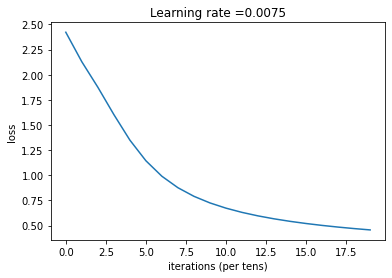

In [85]:
# Ahahaha, lets go
params = ann_model(train_df_X_1,train_df_y_1,dimensions, num_iterations = 2000, print_loss = True)

In [86]:
# lets write the prediction function while it runs
def predict(X,y,parameters):
    # Forward propagation
    probas, memo = multi_layer_forward(X, parameters)
    
    p = np.argmax(probas, axis = 0)
    act = np.argmax(y, axis = 0)
    
    acu = np.sum((p==act)/X.shape[1])
    return p, acu

In [87]:
train_df_y_pred, accuracy = predict(train_df_X_1,train_df_y_1,params)
print(accuracy)

0.8774000000000002


- pretty good for 5000 observations

In [88]:
# lets try predict on test set using these params
test_X_1 =test_X[:,0:5000]
test_y_1 = test_y[:,0:5000]
test_pred, accuracy = predict(test_X_1,test_y_1,params)
print(accuracy)

0.8304000000000001


- I am okay with it we will include more samples during training

Text(0.5, 1.0, 'True Label: 5 Predicted label: 0')

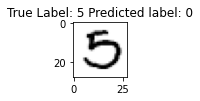

In [89]:
# Lets play with it in test set
import random
n= random.randint(0,5000)
pict = test_X_1[:,n]
truelabel = np.argmax(test_y_1, axis=0)[n]
predictedlabel= int(test_pred[n])
plt.figure(figsize=(1,1))
plt.imshow(pict.reshape(28,28),cmap="Greys")
plt.title("True Label: "+str(truelabel)+" Predicted label: "+str(predictedlabel))